In [1]:
import math
import numpy as np
import random
pi = math.pi
import pandas as pd
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
plt.ion()
#from matplotlib.legend_handler import LandlerTuple
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import signal
import re

mpl.rcdefaults()
mpl.style.use('default')

# Comment tLis to not Lave latex plots

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


/home/diego/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [93]:
mycmap=["teal","mediumaquamarine","chocolate","sandybrown","blueviolet","violet","seagreen","darkseagreen"]
mycmap=["#003a7d","#008dff","#ff73b6","#c701ff","#4ecb8d","#ff9d3a","#f9e858","#d83034"]



### FF $D_1(z)$

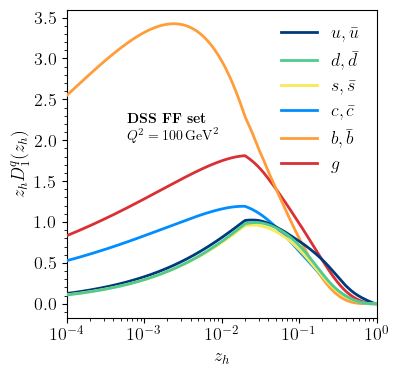

In [102]:
df = pd.read_csv('./output/data/D1   10.dat', sep='&', decimal = '.')
dfH = pd.read_csv('./output/data/D1   20.dat', sep='&', decimal = '.')
dfL = pd.read_csv('./output/data/D1    5.dat', sep='&', decimal = '.')
N=df.shape[0] -1

Q2=100 #GeV^2

z = df['z']
u = df['u']
ub = df['ub']
d = df['d']  
db = df['db']
s = df['s']  
sb = df['sb']
c = df['c']  
b = df['b']  
gl = df['gl']

uH =  dfH['u']
ubH = dfH['ub']
dH =  dfH['d']  
dbH = dfH['db']
sH =  dfH['s']  
sbH = dfH['sb']
cH =  dfH['c']  
bH =  dfH['b']  
glH = dfH['gl']

uL =  dfL['u']
ubL = dfL['ub']
dL =  dfL['d']  
dbL = dfL['db']
sL =  dfL['s']  
sbL = dfL['sb']
cL =  dfL['c']  
bL =  dfL['b']  
glL = dfL['gl']


w = 4
h = 4

fs = 13
save = True


cmap = plt.get_cmap('Set2')
cmapset1 = plt.get_cmap('Set1')
plt.figure(figsize=(w,h))

lwdth = 2
# Plot model + data
plt.plot(z,z*u, color=mycmap[0],label='$u,\\bar{u}$',zorder=9,linewidth=lwdth)
#plt.plot(z,z*u, color=cmap(1), linestyle='dotted', label='$\\bar{u}$')
plt.plot(z,z*d, color=mycmap[4],linestyle='solid',label='$d,\\bar{d}$',zorder=11,linewidth=lwdth)
#plt.plot(z,z*db, color=cmap(3), linestyle='dotted', label='$\\bar{d}$')
plt.plot(z,z*s, color=mycmap[6],linestyle='solid',label='$s,\\bar{s}$',zorder=10,linewidth=lwdth)
#plt.plot(z,z*sb, color=cmap(5), linestyle='dotted', label='$\\bar{s}$')
plt.plot(z,z*c, color=mycmap[1],label='$c,\\bar{c}$',zorder=7,linewidth=lwdth)
plt.plot(z,z*b, color=mycmap[5],label='$b,\\bar{b}$',zorder=6,linewidth=lwdth)
plt.plot(z,z*gl, color=mycmap[7],label='$g$',zorder=5,linewidth=lwdth)
#plt.fill_between(z, z*uH,z*uL, facecolor= cmap(0), alpha = 0.5,label='$u,\\bar{u}$',zorder=10)
#plt.fill_between(z, z*dH,z*dL, facecolor= cmap(2), alpha = 0.5, label='$d,\\bar{d}$',zorder=9)
#plt.fill_between(z, z*sH,z*sL, facecolor= cmap(4), alpha = 0.3,label='$s,\\bar{s}$',zorder=8)
#plt.fill_between(z, z*cH,z*cL, facecolor= cmap(5), alpha = 0.5,label='$c,\\bar{c}$',zorder=7)
#plt.fill_between(z, z*bH,z*bL, facecolor= cmap(6), alpha = 0.5,label='$b,\\bar{b}$',zorder=6)
#plt.fill_between(z, z*glH,z*glL, facecolor= 'red', alpha = 0.5,label='$g$',zorder=5)

plt.xscale('log')
plt.xlim(0.0001,1)
#plt.ylim(0)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.minorticks_on()
plt.xlabel('$z_h$ ', fontsize = fs)
plt.ylabel('$z_h D_1^q(z_h)$', fontsize = fs)
plt.legend(fancybox= True, framealpha=0, loc='best', fontsize = fs, ncols=1)

info = '$\\textbf{DSS FF set}$' + '\n'+ '$Q^2='+str(Q2)+'\\,\\textrm{GeV}^2$'
plt.text(0.0006,2.0,info)
## Save figure if
if(save == True):
        plt.savefig('./output/fig/D1.pdf', dpi=300, bbox_inches='tight')

plt.show()

### PDFs

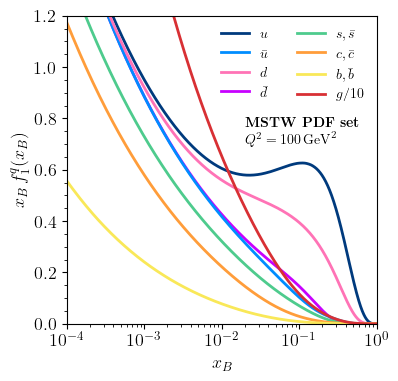

In [100]:
df = pd.read_csv('./output/data/f1   10.dat', sep='&', decimal = '.')
dfH = pd.read_csv('./output/data/f1   20.dat', sep='&', decimal = '.')
dfL = pd.read_csv('./output/data/f1    5.dat', sep='&', decimal = '.')
N=df.shape[0] -1

x =   df['x']
uv =  df['uv']
dv =  df['dv']
usea =df['usea']
dsea =df['dsea']
s =   df['s']
sb =  df['sb']
c =   df['c']
cb =  df['cb']
b =   df['b']
bb =  df['bb']
gl =  df['gl']
ph =  df['ph']

xH =   dfH['x']
uvH =  dfH['uv']
dvH =  dfH['dv']
useaH =dfH['usea']
dseaH =dfH['dsea']
sH =   dfH['s']
sbH =  dfH['sb']
cH =   dfH['c']
cbH =  dfH['cb']
bH =   dfH['b']
bbH =  dfH['bb']
glH =  dfH['gl']
phH =  dfH['ph']


xL =   dfL['x']
uvL =  dfL['uv']
dvL =  dfL['dv']
useaL =dfL['usea']
dseaL =dfL['dsea']
sL =   dfL['s']
sbL =  dfL['sb']
cL =   dfL['c']
cbL =  dfL['cb']
bL =   dfL['b']
bbL =  dfL['bb']
glL =  dfL['gl']
phL =  dfL['ph']

w = 4
h = 4

fs = 13
save = True


cmap = plt.get_cmap('Set2')
plt.figure(figsize=(w,h))

lwdth=2

# Plot model + data
plt.plot(x,x*(uv+usea), color=mycmap[0], label='$u$',linewidth=lwdth)
plt.plot(x,x*usea, color=mycmap[1], linestyle='solid', label='$\\bar{u}$',zorder=0,linewidth=lwdth)
plt.plot(x,x*(dv+dsea), color=mycmap[2], label='$d$',linewidth=lwdth)
plt.plot(x,x*dsea, color=mycmap[3], linestyle='solid', label='$\\bar{d}$',zorder=-1,linewidth=lwdth)
plt.plot(x,x*s, color=mycmap[4], label='$s,\\bar{s}$',linewidth=lwdth)
#plt.plot(x,x*sb, color=cmap(5), linestyle='dotted', label='$\\bar{s}$')
plt.plot(x,x*c, color=mycmap[5], label='$c,\\bar{c}$',linewidth=lwdth)
##plt.plot(x,x*cb, color=cmap(7), linestyle='dotted', label='$\\bar{c}$')
plt.plot(x,x*b, color=mycmap[6], label='$b,\\bar{b}$',linewidth=lwdth)
##plt.plot(x,x*bb, color=cmap(9), linestyle='dotted', label='$\\bar{b}$')
plt.plot(x,x*gl/10, color=mycmap[7], label='$g/10$',linewidth=lwdth)
###plt.plot(x,x*ph, color=cmap(14), label='$\\gamma$')

#plt.fill_between(x,x*(uvH+useaH),x*(uvL+useaL), facecolor=cmap(0), 
#                 label='$u$',alpha = 0.5,zorder=2)
#plt.fill_between(x,x*useaH,x*useaL, facecolor=cmap(1), linestyle='dotted',
#                  label='$\\bar{u}$',alpha = 0.5,zorder=0)
#plt.fill_between(x,x*(dvH+dseaH),x*(dvL+dseaL), facecolor=cmap(2), 
#                 label='$d$',alpha = 0.5,zorder=0)
#plt.fill_between(x,x*dseaH,x*dseaL, facecolor=cmap(3), linestyle='dotted', 
#                 label='$\\bar{d}$',alpha = 0.5,zorder=1)
#plt.fill_between(x,x*sH,x*sL, facecolor=cmap(4),
#                  label='$s,\\bar{s}$',alpha = 0.5,zorder=-8)
##pltfill_between((x,x*sb, color=cmap(5), linestyle='dotted', label='$\\bar{s}$')
#plt.fill_between(x,x*cH, x*cL,facecolor=cmap(5), 
#                 label='$c,\\bar{c}$',alpha = 0.5,zorder=-9)
##pltfill_between((x,x*cb, color=cmap(7), linestyle='dotted', label='$\\bar{c}$')
#plt.fill_between(x,x*bH,x*bL, facecolor=cmap(6), 
#                 label='$b,\\bar{b}$',alpha = 0.5,zorder=-10)
##pltfill_between((x,x*bb, color=cmap(9), linestyle='dotted', label='$\\bar{b}$')
#plt.fill_between(x,x*glH/10,x*glL/10, facecolor=cmap(7), 
#                 label='$g/10$',alpha = 0.5,zorder=-10)
##plt.plot(x,x*ph, color=cmap(14), label='$\\gamma$')


#y_err = z.std() * np.sqrt(1/len(z) +
#                          (z - z.mean())**2 / np.sum((z - z.mean())**2))
#plt.fill_between(x,x*(uv+usea)-y_err,x*(uv+usea)+y_err, facecolor='k', 
#                 label='$u$',alpha = 0.5,zorder=2)

plt.ylim(0,1.2)
plt.xlim(1e-4,1)
plt.xscale('log')
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.minorticks_on()
plt.xlabel('$x_B$ ', fontsize = fs)
plt.ylabel('$x_B\\, f_1^q(x_B)$', fontsize = fs)
plt.legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-3, ncol=2)


info = '$\\textbf{MSTW PDF set}$' + '\n'+ '$Q^2='+str(Q2)+'\\,\\textrm{GeV}^2$'#+\
                #'\n$Q/2<\\mu<2Q$'

plt.text(0.02,0.70,info)
#plt.text(0.4, 1,info, fontsize = fs)
## Save figure if
if(save == True):
        plt.savefig('./output/fig/f1.pdf', dpi=300, bbox_inches='tight')

plt.show()

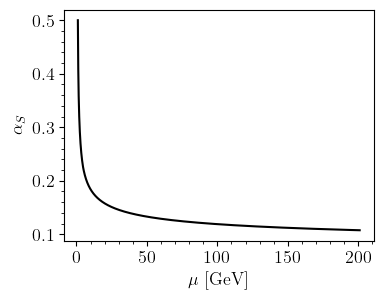

In [4]:
df = pd.read_csv('./output/data/alpha_S.dat',sep='&', decimal = '.')
df
mu = df['mu']
alphas = df['alpha_S']
w = 4
h = 3

fs = 13
save = True


cmap = plt.get_cmap('Dark2')
plt.figure(figsize=(w,h))

plt.plot(mu, alphas, color='k')

#plt.ylim(0,1.2)
#plt.xlim(1e-4,1)
#plt.yscale('log')
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.minorticks_on()
plt.xlabel('$\\mu$ [GeV]', fontsize = fs)
plt.ylabel('$\\alpha_S$', fontsize = fs)
#plt.legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-3, ncol=2)


## Save figure if
if(save == True):
        plt.savefig('./output/fig/alpha_S.pdf', dpi=300, bbox_inches='tight')

plt.show()

Sigma xz

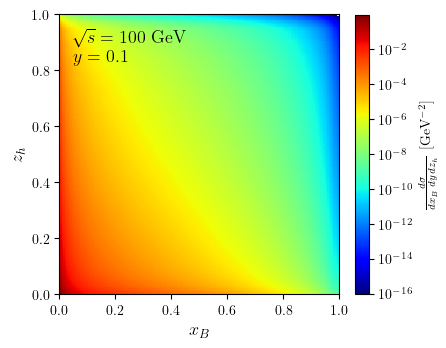

In [5]:
df = pd.read_csv('./output/data/sigma_xz.dat',header=None,sep='&', decimal = '.')
N=df.shape[0]


sqrtS = 100 # GeV
y=0.1

df=df.loc[:, df.columns != N].T

save_fig = True
cmap = mpl.cm.jet
cmap2 = plt.get_cmap('tab20')
w = 4
h = 4
fontsize = 13
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot()
extent = [0,1,0,1]
img = ax.imshow(df, extent=extent, cmap=cmap, interpolation='none',
                norm=LogNorm(), origin='lower')
plt.colorbar(img, fraction=0.045,label = '$\\frac{d\\sigma}{dx_B\\,dy\\,dz_h}$ [GeV$^{-2}$]')
plt.xlabel("$x_B$", fontsize = fs)
plt.ylabel("$z_h$", fontsize = fs)
info = '$\\sqrt{s}=' + str(sqrtS)+'$ GeV\n$y=' + str(y)+'$'

plt.text(0.05,0.83,info,fontsize=fs)
if(save == True):
        plt.savefig('./output/fig/dsigmadxdz.pdf', dpi=300, bbox_inches='tight')

plt.show()

Sigma y

<Figure size 800x300 with 0 Axes>

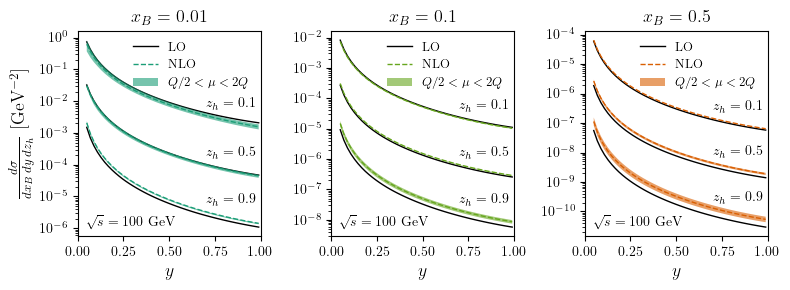

In [26]:
df = pd.read_csv('./output/data/sigma_y_x0.01_z0.10.dat', sep='&', decimal = '.')
N=df.shape[0]

y = df['y'][2:N]
sigma11 = df['sigma'] [2:N]
sigmaNLO11 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q11 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd211 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_y_x0.01_z0.50.dat', sep='&', decimal = '.')
sigma15 = df['sigma'][2:N]
sigmaNLO15 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q15 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd215 =df['sigmaNLOmuQd2'][2:N] 

df = pd.read_csv('./output/data/sigma_y_x0.01_z0.90.dat', sep='&', decimal = '.')
sigma19 = df['sigma'][2:N]
sigmaNLO19 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q19 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd219 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_y_x0.1_z0.1.dat', sep='&', decimal = '.')

sigma51 = df['sigma'][2:N]
sigmaNLO51 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q51 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd251 =df['sigmaNLOmuQd2'] [2:N]

df=0
df = pd.read_csv('./output/data/sigma_y_x0.1_z0.5.dat', sep='&', decimal = '.')
sigma55 = df['sigma'][2:N]
sigmaNLO55 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q55 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd255 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_y_x0.1_z0.9.dat', sep='&', decimal = '.')
sigma59 = df['sigma'][2:N]
sigmaNLO59 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q59 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd259 =df['sigmaNLOmuQd2'] [2:N]


df = pd.read_csv('./output/data/sigma_y_x0.5_z0.1.dat', sep='&', decimal = '.')
sigma91 = df['sigma'][2:N]
sigmaNLO91 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q91 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd291 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_y_x0.5_z0.5.dat', sep='&', decimal = '.')
sigma95 = df['sigma'][2:N]
sigmaNLO95 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q95 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd295 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_y_x0.5_z0.9.dat', sep='&', decimal = '.')
sigma99 = df['sigma'][2:N]
sigmaNLO99 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q99 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd299 =df['sigmaNLOmuQd2'] [2:N]

N=df.shape[0] -1
#print(df)

sqrtS = 100 # GeV
xB = 0.5
xB1 = 0.01
xB5= 0.1
xB9 = 0.5
zh1=0.1
zh5=0.5
zh9=0.9

w = 8
h = 3

fs = 13
save = True


cmap = plt.get_cmap('Dark2')
cmap_cont = plt.get_cmap('plasma')

plt.figure(figsize=(w,h))

clr = cmap(0)
clr2 = cmap(4)
clr3 = cmap(1)
#clr =  cmap_cont(.2)
#clr2 = cmap_cont(.4)
#clr3 = cmap_cont(.6)
lnwdth = 1.
lnwdth2 = 1.
alph=.6

fig, axs = plt.subplots(1,3, figsize= (w,h), sharex = False)


axs[0].plot(y,sigma11, color='k',linewidth=lnwdth2, label = 'LO')
axs[0].plot(y,sigmaNLO11, color=clr, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[0].fill_between(y,sigmaNLOmu2Q11,sigmaNLOmuQd211, facecolor=clr, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[0].plot(y,sigma15, linewidth=lnwdth2,color='k')
axs[0].plot(y,sigmaNLO15, color=clr, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[0].fill_between(y,sigmaNLOmu2Q15,sigmaNLOmuQd215, facecolor=clr,alpha = alph,zorder=+10)

axs[0].plot(y,sigma19, linewidth=lnwdth2,color='k')
axs[0].plot(y,sigmaNLO19, color=clr, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[0].fill_between(y,sigmaNLOmu2Q19,sigmaNLOmuQd219, facecolor=clr,alpha = alph,zorder=+10)

axs[1].plot(y,sigma51,linewidth=lnwdth2, color='k', label = 'LO')
axs[1].plot(y,sigmaNLO51, color=clr2, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[1].fill_between(y,sigmaNLOmu2Q51,sigmaNLOmuQd251, facecolor=clr2, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[1].plot(y,sigma55, linewidth=lnwdth2,color='k')
axs[1].plot(y,sigmaNLO55, color=clr2, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[1].fill_between(y,sigmaNLOmu2Q55,sigmaNLOmuQd255, facecolor=clr2,alpha = alph,zorder=+10)

axs[1].plot(y,sigma59, linewidth=lnwdth2,color='k')
axs[1].plot(y,sigmaNLO59, color=clr2, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[1].fill_between(y,sigmaNLOmu2Q59,sigmaNLOmuQd259, facecolor=clr2,alpha = alph,zorder=+10)

axs[2].plot(y,sigma91, linewidth=lnwdth2,color='k', label = 'LO')
axs[2].plot(y,sigmaNLO91, color=clr3, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[2].fill_between(y,sigmaNLOmu2Q91,sigmaNLOmuQd291, facecolor=clr3, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[2].plot(y,sigma95,linewidth=lnwdth2, color='k')
axs[2].plot(y,sigmaNLO95, color=clr3, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[2].fill_between(y,sigmaNLOmu2Q95,sigmaNLOmuQd295, facecolor=clr3,alpha = alph,zorder=+10)

axs[2].plot(y,sigma99,linewidth=lnwdth2, color='k')
axs[2].plot(y,sigmaNLO99, color=clr3, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[2].fill_between(y,sigmaNLOmu2Q99,sigmaNLOmuQd299, facecolor=clr3,alpha = alph,zorder=+10)

#axs[0].xticks(fontsize = fs)
#axs[0].yticks(fontsize = fs)
#axs[0].minorticks_on()
axs[0].set_xlabel('$y$ ', fontsize = fs)
axs[1].set_xlabel('$y$ ', fontsize = fs)
axs[2].set_xlabel('$y$ ', fontsize = fs)
axs[0].set_ylabel('$\\frac{d\\sigma}{dx_B\\,dy\\,dz_h}$ [GeV$^{-2}$]', fontsize = fs)


#axs[0].ylabel('$\\frac{d\\sigma}{dx_B\,dy\\,dz_h}$ [GeV$^{-2}$]', fontsize = fs)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

axs[0].set_xlim(0.,1.)
axs[1].set_xlim(0.,1.)
axs[2].set_xlim(0.,1.)
#plt.xscale('log')

info = '$\\sqrt{s}=' + str(sqrtS)+'$ GeV'
info1  ='$z_h = ' + str(zh1) + '$'
info5  ='$z_h = ' + str(zh5) + '$'
info9  ='$z_h = ' + str(zh9) + '$'
tl1  ='$x_B = ' + str(xB1) + '$'
tl5  ='$x_B = ' + str(xB5) + '$'
tl9  ='$x_B = ' + str(xB9) + '$'
#plt.text(y.min(), sigma.min(),info, fontsize=fs-3)
axs[0].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[1].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[2].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[0].set_title(tl1,fontsize=fs)
axs[1].set_title(tl5,fontsize=fs)
axs[2].set_title(tl9,fontsize=fs)

axs[0].text(0.7, 4*sigmaNLO11.min(),info1, fontsize = fs-3)
axs[0].text(0.7, 4*sigmaNLO15.min(),info5, fontsize = fs-3)
axs[0].text(0.7, 4*sigmaNLO19.min(),info9, fontsize = fs-3)
axs[1].text(0.7, 4*sigmaNLO51.min(),info1, fontsize = fs-3)
axs[1].text(0.7, 4*sigmaNLO55.min(),info5, fontsize = fs-3)
axs[1].text(0.7, 4*sigmaNLO59.min(),info9, fontsize = fs-3)
axs[2].text(0.7, 4*sigmaNLO91.min(),info1, fontsize = fs-3)
axs[2].text(0.7, 4*sigmaNLO95.min(),info5, fontsize = fs-3)
axs[2].text(0.7, 4*sigmaNLO99.min(),info9, fontsize = fs-3)

axs[0].text(0.05, sigma19.min(),info, fontsize = fs-3)
axs[1].text(0.05, sigma59.min(),info, fontsize = fs-3)
axs[2].text(0.05, sigma99.min(),info, fontsize = fs-3)

plt.tight_layout()
## Save figure if
if(save == True):
        plt.savefig('./output/fig/sigmaUUU_NLO(y).pdf', dpi=300, bbox_inches='tight')

plt.show()

<Figure size 800x300 with 0 Axes>

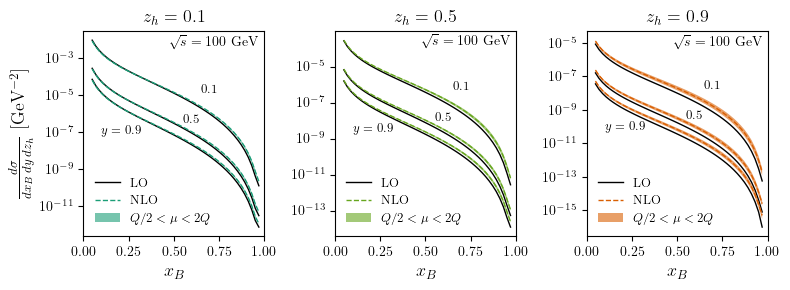

In [4]:
df = pd.read_csv('./output/data/sigma_x_y0.10_z0.10.dat', sep='&', decimal = '.')
N=df.shape[0]-1

x = df['x'][2:N]
sigma11 = df['sigma'] [2:N]
sigmaNLO11 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q11 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd211 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_x_y0.10_z0.50.dat', sep='&', decimal = '.')
sigma15 = df['sigma'][2:N]
sigmaNLO15 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q15 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd215 =df['sigmaNLOmuQd2'][2:N] 

df = pd.read_csv('./output/data/sigma_x_y0.10_z0.90.dat', sep='&', decimal = '.')
sigma19 = df['sigma'][2:N]
sigmaNLO19 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q19 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd219 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_x_y0.50_z0.10.dat', sep='&', decimal = '.')

sigma51 = df['sigma'][2:N]
sigmaNLO51 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q51 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd251 =df['sigmaNLOmuQd2'] [2:N]

df=0
df = pd.read_csv('./output/data/sigma_x_y0.50_z0.50.dat', sep='&', decimal = '.')
sigma55 = df['sigma'][2:N]
sigmaNLO55 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q55 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd255 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_x_y0.50_z0.90.dat', sep='&', decimal = '.')
sigma59 = df['sigma'][2:N]
sigmaNLO59 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q59 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd259 =df['sigmaNLOmuQd2'] [2:N]


df = pd.read_csv('./output/data/sigma_x_y0.90_z0.10.dat', sep='&', decimal = '.')
sigma91 = df['sigma'][2:N]
sigmaNLO91 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q91 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd291 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_x_y0.90_z0.50.dat', sep='&', decimal = '.')
sigma95 = df['sigma'][2:N]
sigmaNLO95 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q95 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd295 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_x_y0.90_z0.90.dat', sep='&', decimal = '.')
sigma99 = df['sigma'][2:N]
sigmaNLO99 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q99 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd299 =df['sigmaNLOmuQd2'] [2:N]

N=df.shape[0] -1
#print(df)

sqrtS = 100 # GeV
y1 = 0.1
y5 = 0.5
y9= 0.9
zh1=0.1
zh5=0.5
zh9=0.9

w = 8
h = 3

fs = 13
save = True


cmap = plt.get_cmap('Dark2')
cmap_cont = plt.get_cmap('plasma')

plt.figure(figsize=(w,h))

clr = cmap(0)
clr2 = cmap(4)
clr3 = cmap(1)
#clr =  cmap_cont(.2)
#clr2 = cmap_cont(.4)
#clr3 = cmap_cont(.6)
lnwdth = 1.
lnwdth2 = 1.
alph=.6

fig, axs = plt.subplots(1,3, figsize= (w,h), sharex = False)


axs[0].plot(x,sigma11, color='k',linewidth=lnwdth2, label = 'LO')
axs[0].plot(x,sigmaNLO11, color=clr, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[0].fill_between(x,sigmaNLOmu2Q11,sigmaNLOmuQd211, facecolor=clr, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[0].plot(x,sigma51, linewidth=lnwdth2,color='k')
axs[0].plot(x,sigmaNLO51, color=clr, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[0].fill_between(x,sigmaNLOmu2Q51,sigmaNLOmuQd251, facecolor=clr,alpha = alph,zorder=+10)

axs[0].plot(x,sigma91, linewidth=lnwdth2,color='k')
axs[0].plot(x,sigmaNLO91, color=clr, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[0].fill_between(x,sigmaNLOmu2Q91,sigmaNLOmuQd291, facecolor=clr,alpha = alph,zorder=+10)

axs[1].plot(x,sigma15,linewidth=lnwdth2, color='k', label = 'LO')
axs[1].plot(x,sigmaNLO15, color=clr2, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[1].fill_between(x,sigmaNLOmu2Q15,sigmaNLOmuQd215, facecolor=clr2, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[1].plot(x,sigma55, linewidth=lnwdth2,color='k')
axs[1].plot(x,sigmaNLO55, color=clr2, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[1].fill_between(x,sigmaNLOmu2Q55,sigmaNLOmuQd255, facecolor=clr2,alpha = alph,zorder=+10)

axs[1].plot(x,sigma95, linewidth=lnwdth2,color='k')
axs[1].plot(x,sigmaNLO95, color=clr2, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[1].fill_between(x,sigmaNLOmu2Q95,sigmaNLOmuQd295, facecolor=clr2,alpha = alph,zorder=+10)

axs[2].plot(x,sigma19, linewidth=lnwdth2,color='k', label = 'LO')
axs[2].plot(x,sigmaNLO19, color=clr3, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[2].fill_between(x,sigmaNLOmu2Q19,sigmaNLOmuQd219, facecolor=clr3, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[2].plot(x,sigma59,linewidth=lnwdth2, color='k')
axs[2].plot(x,sigmaNLO59, color=clr3, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[2].fill_between(x,sigmaNLOmu2Q59,sigmaNLOmuQd259, facecolor=clr3,alpha = alph,zorder=+10)

axs[2].plot(x,sigma99,linewidth=lnwdth2, color='k')
axs[2].plot(x,sigmaNLO99, color=clr3, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[2].fill_between(x,sigmaNLOmu2Q99,sigmaNLOmuQd299, facecolor=clr3,alpha = alph,zorder=+10)

#axs[0].xticks(fontsize = fs)
#axs[0].yticks(fontsize = fs)
#axs[0].minorticks_on()
axs[0].set_xlabel('$x_B$ ', fontsize = fs)
axs[1].set_xlabel('$x_B$ ', fontsize = fs)
axs[2].set_xlabel('$x_B$ ', fontsize = fs)
axs[0].set_ylabel('$\\frac{d\\sigma}{dx_B\\,dy\\,dz_h}$ [GeV$^{-2}$]', fontsize = fs)


#axs[0].ylabel('$\\frac{d\\sigma}{dx_B\,dy\\,dz_h}$ [GeV$^{-2}$]', fontsize = fs)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

axs[0].set_xlim(0.,1.)
axs[1].set_xlim(0.,1.)
axs[2].set_xlim(0.,1.)
#plt.xscale('log')

info = '$\\sqrt{s}=' + str(sqrtS)+'$ GeV'
tl1  ='$z_h = ' + str(zh1) + '$'
tl5  ='$z_h = ' + str(zh5) + '$'
tl9  ='$z_h = ' + str(zh9) + '$'
info1  ='$y = ' + str(y1) + '$'
info5  ='$y = ' + str(y5) + '$'
info9  ='$y = ' + str(y9) + '$'
#plt.text(y.min(), sigma.min(),info, fontsize=fs-3)
axs[0].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[1].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[2].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[0].set_title(tl1,fontsize=fs)
axs[1].set_title(tl5,fontsize=fs)
axs[2].set_title(tl9,fontsize=fs)

axs[0].text(0.65, sigmaNLO11.median(),'0.1', fontsize = fs-4)
axs[0].text(0.55, sigmaNLO51.median(),'0.5', fontsize = fs-4)
axs[0].text(0.1, sigmaNLO91.median(),info9, fontsize = fs-4)
axs[1].text(0.65, sigmaNLO15.median(),'0.1', fontsize = fs-4)
axs[1].text(0.55, sigmaNLO55.median(),'0.5', fontsize = fs-4)
axs[1].text(0.1, sigmaNLO95.median(),info9, fontsize = fs-4)
axs[2].text(0.65, sigmaNLO19.median(),'0.1', fontsize = fs-4)
axs[2].text(0.55, sigmaNLO59.median(),'0.5', fontsize = fs-4)
axs[2].text(0.1, sigmaNLO99.median(),info9, fontsize = fs-4)

axs[0].text(0.48, 0.5*sigmaNLO11.max(),info, fontsize = fs-3)
axs[1].text(0.48, 0.5*sigmaNLO15.max(),info, fontsize = fs-3)
axs[2].text(0.48, 0.5*sigmaNLO19.max(),info, fontsize = fs-3)

plt.tight_layout()
## Save figure if
if(save == True):
        plt.savefig('./output/fig/sigmaUUU_NLO(x).pdf', dpi=300, bbox_inches='tight')

plt.show()

<Figure size 800x300 with 0 Axes>

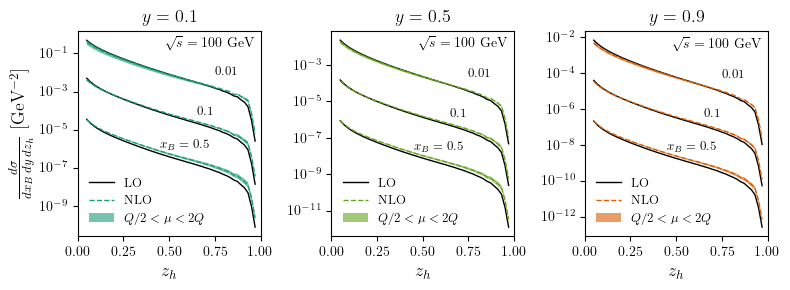

In [6]:
df = pd.read_csv('./output/data/sigma_z_x0.01_y0.10.dat', sep='&', decimal = '.')
N=df.shape[0]-1

y = df['z'][2:N]
sigma11 = df['sigma'] [2:N]
sigmaNLO11 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q11 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd211 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_z_x0.01_y0.50.dat', sep='&', decimal = '.')
sigma15 = df['sigma'][2:N]
sigmaNLO15 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q15 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd215 =df['sigmaNLOmuQd2'][2:N] 

df = pd.read_csv('./output/data/sigma_z_x0.01_y0.90.dat', sep='&', decimal = '.')
sigma19 = df['sigma'][2:N]
sigmaNLO19 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q19 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd219 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_z_x0.10_y0.10.dat', sep='&', decimal = '.')

sigma51 = df['sigma'][2:N]
sigmaNLO51 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q51 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd251 =df['sigmaNLOmuQd2'] [2:N]

df=0
df = pd.read_csv('./output/data/sigma_z_x0.10_y0.50.dat', sep='&', decimal = '.')
sigma55 = df['sigma'][2:N]
sigmaNLO55 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q55 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd255 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_z_x0.10_y0.90.dat', sep='&', decimal = '.')
sigma59 = df['sigma'][2:N]
sigmaNLO59 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q59 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd259 =df['sigmaNLOmuQd2'] [2:N]


df = pd.read_csv('./output/data/sigma_z_x0.50_y0.10.dat', sep='&', decimal = '.')
sigma91 = df['sigma'][2:N]
sigmaNLO91 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q91 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd291 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_z_x0.50_y0.50.dat', sep='&', decimal = '.')
sigma95 = df['sigma'][2:N]
sigmaNLO95 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q95 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd295 =df['sigmaNLOmuQd2'] [2:N]

df = pd.read_csv('./output/data/sigma_z_x0.50_y0.90.dat', sep='&', decimal = '.')
sigma99 = df['sigma'][2:N]
sigmaNLO99 = df['sigmaNLO'][2:N]
sigmaNLOmu2Q99 = df['sigmaNLOmu2Q'][2:N]
sigmaNLOmuQd299 =df['sigmaNLOmuQd2'] [2:N]

N=df.shape[0] -1
#print(df)

sqrtS = 100 # GeV
xB1 = 0.01
xB5= 0.1
xB9 = 0.5
y1=0.1
y5=0.5
y9=0.9

w = 8
h = 3

fs = 13
save = True


cmap = plt.get_cmap('Dark2')
cmap_cont = plt.get_cmap('plasma')

plt.figure(figsize=(w,h))

clr = cmap(0)
clr2 = cmap(4)
clr3 = cmap(1)
#clr =  cmap_cont(.2)
#clr2 = cmap_cont(.4)
#clr3 = cmap_cont(.6)
lnwdth = 1.
lnwdth2 = 1.
alph=.6

fig, axs = plt.subplots(1,3, figsize= (w,h), sharex = False)


axs[0].plot(x,sigma11, color='k',linewidth=lnwdth2, label = 'LO')
axs[0].plot(x,sigmaNLO11, color=clr, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[0].fill_between(x,sigmaNLOmu2Q11,sigmaNLOmuQd211, facecolor=clr, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[0].plot(x,sigma51, linewidth=lnwdth2,color='k')
axs[0].plot(x,sigmaNLO51, color=clr, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[0].fill_between(x,sigmaNLOmu2Q51,sigmaNLOmuQd251, facecolor=clr,alpha = alph,zorder=+10)

axs[0].plot(x,sigma91, linewidth=lnwdth2,color='k')
axs[0].plot(x,sigmaNLO91, color=clr, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[0].fill_between(x,sigmaNLOmu2Q91,sigmaNLOmuQd291, facecolor=clr,alpha = alph,zorder=+10)

axs[1].plot(x,sigma15,linewidth=lnwdth2, color='k', label = 'LO')
axs[1].plot(x,sigmaNLO15, color=clr2, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[1].fill_between(x,sigmaNLOmu2Q15,sigmaNLOmuQd215, facecolor=clr2, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[1].plot(x,sigma55, linewidth=lnwdth2,color='k')
axs[1].plot(x,sigmaNLO55, color=clr2, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[1].fill_between(x,sigmaNLOmu2Q55,sigmaNLOmuQd255, facecolor=clr2,alpha = alph,zorder=+10)

axs[1].plot(x,sigma95, linewidth=lnwdth2,color='k')
axs[1].plot(x,sigmaNLO95, color=clr2, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[1].fill_between(x,sigmaNLOmu2Q95,sigmaNLOmuQd295, facecolor=clr2,alpha = alph,zorder=+10)

axs[2].plot(x,sigma19, linewidth=lnwdth2,color='k', label = 'LO')
axs[2].plot(x,sigmaNLO19, color=clr3, linestyle="dashed",linewidth=lnwdth, label = 'NLO',zorder=+11)
axs[2].fill_between(x,sigmaNLOmu2Q19,sigmaNLOmuQd219, facecolor=clr3, 
              label='$Q/2<\\mu<2Q$',alpha = alph,zorder=+10)

axs[2].plot(x,sigma59,linewidth=lnwdth2, color='k')
axs[2].plot(x,sigmaNLO59, color=clr3, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[2].fill_between(x,sigmaNLOmu2Q59,sigmaNLOmuQd259, facecolor=clr3,alpha = alph,zorder=+10)

axs[2].plot(x,sigma99,linewidth=lnwdth2, color='k')
axs[2].plot(x,sigmaNLO99, color=clr3, linestyle="dashed",linewidth=lnwdth,zorder=+11)
axs[2].fill_between(x,sigmaNLOmu2Q99,sigmaNLOmuQd299, facecolor=clr3,alpha = alph,zorder=+10)

#axs[0].xticks(fontsize = fs)
#axs[0].yticks(fontsize = fs)
#axs[0].minorticks_on()
axs[0].set_xlabel('$z_h$ ', fontsize = fs)
axs[1].set_xlabel('$z_h$ ', fontsize = fs)
axs[2].set_xlabel('$z_h$ ', fontsize = fs)
axs[0].set_ylabel('$\\frac{d\\sigma}{dx_B\\,dy\\,dz_h}$ [GeV$^{-2}$]', fontsize = fs)


#axs[0].ylabel('$\\frac{d\\sigma}{dx_B\,dy\\,dz_h}$ [GeV$^{-2}$]', fontsize = fs)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

axs[0].set_xlim(0.,1.)
axs[1].set_xlim(0.,1.)
axs[2].set_xlim(0.,1.)
#plt.xscale('log')

info = '$\\sqrt{s}=' + str(sqrtS)+'$ GeV'
info1  ='$x_B = ' + str(xB1) + '$'
info5  ='$x_B = ' + str(xB5) + '$'
info9  ='$x_B = ' + str(xB9) + '$'
tl1  ='$y = ' + str(y1) + '$'
tl5  ='$y = ' + str(y5) + '$'
tl9  ='$y = ' + str(y9) + '$'
#plt.text(y.min(), sigma.min(),info, fontsize=fs-3)
axs[0].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[1].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[2].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)
axs[0].set_title(tl1,fontsize=fs)
axs[1].set_title(tl5,fontsize=fs)
axs[2].set_title(tl9,fontsize=fs)
axs[0].text(0.75, sigmaNLO11.median(),'0.01', fontsize = fs-4)
axs[0].text(0.65, sigmaNLO51.median(),'0.1', fontsize = fs-4)
axs[0].text(0.45, 2*sigmaNLO91.median(),info9, fontsize = fs-4)
axs[1].text(0.75, sigmaNLO15.median(),'0.01', fontsize = fs-4)
axs[1].text(0.65, sigmaNLO55.median(),'0.1', fontsize = fs-4)
axs[1].text(0.45, 2*sigmaNLO95.median(),info9, fontsize = fs-4)
axs[2].text(0.75, sigmaNLO19.median(),'0.01', fontsize = fs-4)
axs[2].text(0.65, sigmaNLO59.median(),'0.1', fontsize = fs-4)
axs[2].text(0.45, 2*sigmaNLO99.median(),info9, fontsize = fs-4)

axs[0].text(0.48, 0.5*sigmaNLO11.max(),info, fontsize = fs-3)
axs[1].text(0.48, 0.5*sigmaNLO15.max(),info, fontsize = fs-3)
axs[2].text(0.48, 0.5*sigmaNLO19.max(),info, fontsize = fs-3)

plt.tight_layout()
## Save figure if
if(save == True):
        plt.savefig('./output/fig/sigmaUUU_NLO(z).pdf', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR1AintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR1BintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR2AintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR2BintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR3AintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR3BintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR4AintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR4BintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR5AintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR5BintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR6AintPhp.mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\WmunuNLOREALq2gqDR6BintPhp.mx"

<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\DrealNc\[Epsilon].mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\DvirtNc\[Epsilon].mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\DrealCF\[Epsilon].mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\DvirtCF\[Epsilon].mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\KvirtCF\[Epsilon].mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\IvirtCF\[Epsilon].mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\KrealCF\[Epsilon].mx"
<< "C:\Users\Utente\Desktop\wolfram_files\saved_expr\IrealCF\[Epsilon].mx"
